# 6.1 매개변수 갱신

최적의 매개변수 찾기 = 최적화 (Optimization)

확률적 경사 하강법 (SGD) : 매개 변수의 기울기를 구해, 기울어진 방향으로 매개 변수 값을 갱신하는 일을 반복해서 최적의 매개 변수를 찾는 과정 

## 6.1.2 확률적 경사 하강법 (SGD)

W = W - r미분(L/W) 

W 는 가중치 매개변수 <br>
r 는 학습률<br>
미분(L/W) 는 W 에 대한 손실함수의 기울기 

기울어진 방향으로 일정거리만 가겠다. 


In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

* lr : learning rate
* update(params, grads) dictinary 변수로 가중치와 기울기를 저장하고 있음 

## 6.1.3 SGD 의 단점 

anisortropy 비등방성 (방향에 따라 성질, 즉 기울기가 달라지는 함수) 에서는 탐색 경로가 비효율 적이다. 

지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문이다. 

## 6.1.4 모멘텀
Momentum : 운동량 

v = av - r미분(L/W)
W = W + v

W : 갱신할 가중치 매개변수 <br>
av : 아무런 힘을 받지 않을 때 서서히 하강시킴 (공기저항)<br>
v : 속도 <br>
기울기 방향으로 힘을 받아 물체가 가속됨 


In [2]:
class Momentum:
    def __init__(self, lr = 0.01, momentum =0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            

v 는 초기에 아무것도 담지 않음 update 호출 될때 매개변수와 같은 구조로 저장됨 

SGD 에 비하면 지그재그 정도가 덜하다.

## 6.1.5 AdaGrad

학습률 을 정하는 기술 학습률 감소 learning rate decay <br>
학습을 진행하면서 학습률을 점차 줄여가는 방법

AdaGrad 는 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것에서 발전시켜 '각각의' 매개변수에 맞춤형 값을 만들어 주는 방식 

개별 매개변수에 적응적(adative) 학습률을 조정하면서 학습을 진행 

h 라는 변수가 등장하여 기존 기울기 값을 제곱하여 계속 더해주고 매개변수가 갱신할 때 1/루트h 를 곱해 학습률을 조정

매개변수의 원소 중에서 많이 움직인 (크게 갱신된) 원소는 학습률이 낮아지게 됨 

과거의 기울기를 제곱해서 계속 더해가서 학습을 진행할수록 갱신 강도가 약해진다. 학습을 계쏙하면 순간 갱신량이 0이되어 전혀 갱신되지 않게 된다. 이를 개선한 RMSProp 는 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영하는 지수이동평균 Exponential Moving Average 라 하여, 과거 기울기의 반영규모를 기하급수적으로 감소 시킨다. 

In [2]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key]/(np.sqrt(self.h[key])+1e-7)

마지막에 +1e-7 작은 값을 더하는 부분은 self.h[key] 에 0이 담겨 있다해도 0으로 나누는 사태를 막아준다.

y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰복으로 작아지도록 조정된다. y 축 방향으로 갱신 강도가 약해졌고, 지그재그 움직임이 줄어든다. 

## 6.1.6 Adam 

모멘텀 : 공이 그릇을 구르는 듯한 물리 법칙에 따른 움직임 <br>
AdaGrad : 매개변수의 원소마다 적응적으로 갱신정도를 조정 <br>
Adam : 이 두 방법을 융합 하이퍼파라미터의 '편향보정', 모멘텀보다 좌우 흔들림이 작음 (학습의 갱신 강도를 적응적으로 조정)

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


## 6.1.7 어느 갱신 방법을 이용할 것인가?

기법의 결과 비교 - 맞춰서 잘 사용하길.. (주로 SGD, Adam 을 사용함)

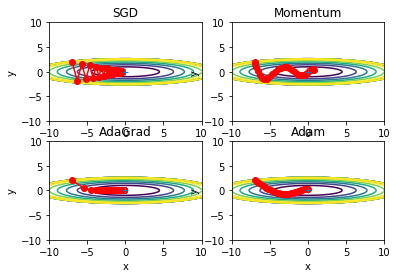

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()


## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

100 개의 뉴런으로 구성된 5층 신경망에서 ReLU 를 활성화 함수로 사용해 측정 

하이퍼파라미터인 학습률과 신경망의 구조에 따라 결과가 달라진다. 


===========iteration:0===========
SGD:2.32673079114
Momentum:2.541961857
AdaGrad:2.33596171541
Adam:2.21237799895
===========iteration:100===========
SGD:1.40796067202
Momentum:0.343553114649
AdaGrad:0.143096497937
Adam:0.293880162376
===========iteration:200===========
SGD:0.857674675638
Momentum:0.341686438048
AdaGrad:0.157223474874
Adam:0.255719674022
===========iteration:300===========
SGD:0.581429014061
Momentum:0.189020691049
AdaGrad:0.059119337957
Adam:0.081316903573
===========iteration:400===========
SGD:0.518722082448
Momentum:0.212188620669
AdaGrad:0.0784261537893
Adam:0.127169053149
===========iteration:500===========
SGD:0.346217128556
Momentum:0.0752360599955
AdaGrad:0.0425821583738
Adam:0.0473747176021
===========iteration:600===========
SGD:0.457257555255
Momentum:0.169846445333
AdaGrad:0.0683963877931
Adam:0.112104790017
===========iteration:700===========
SGD:0.394990750836
Momentum:0.114310178897
AdaGrad:0.0583674341805
Adam:0.067227826877
===========iteration:800===

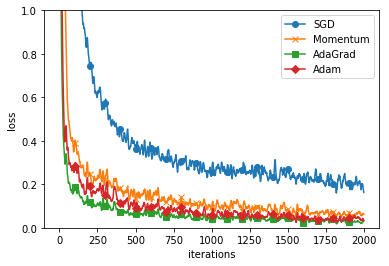

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


# 6.2 가중치의 초기값

## 6.2.1 초기값=0?

가중치 감소 weight decay (오버피팅을 억제해 범용 성능을 높이는 방법) : 가중치 매개변수의 값이 작아지도록 학습하는 방법, 가중치 값을 작게해 오버피팅이 일어나지 않게함

초기값이 0 인경우 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨 

가중치가 고르게 되지 않으려면 초깃값을 무작위로 설정해야 함

## 6.2.2 은닉층의 활성화값 분포 

activation fucntion 의 출력 데이터의 분포 확인

가중치 초기값에 따라서 hidden layer 의 활성화 값이 어떻게 변하는지 확인 

시그모이드와 5 layer 에 무작위 입력 데이터를 흘려 각 층의 활성화 값 분포를 histogram 으로 확인 


In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터 편차가1인 정규분포
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

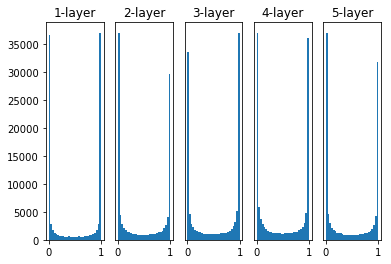

In [2]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 활성화 값들이 0과 1에 치우쳐 분포함 

시그모이드 함수는 출력이 0 또는 1 에 가까우면 미분값이 0 이 됨 

역전파의 기우릭 값이 점점 사라짐 기울기 소실 Gradient Vanishing 
